In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import csv

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
filename_test_binary = "glue_data/SST-2/test.tsv"
filename_test_fine_grained = "glue_data/SST-5/test.tsv"

In [3]:
def get_labels_and_sentences(tsvfile):
    labels = []
    sentences = []
    with open(tsvfile, mode ='r') as file_to_read: 
        file = csv.reader(file_to_read, delimiter='\t') 
        for idx, line in enumerate(file):
            if idx == 0:
                continue
            labels.append(line[0])
            sentences.append(line[1])
            
    return labels, sentences

In [4]:
binary_labels, binary_sentences = get_labels_and_sentences(filename_test_binary)
fg_labels, fg_sentences = get_labels_and_sentences(filename_test_fine_grained)

print(len(binary_labels))

2210


2210
[[1137  164]
 [  77  832]]
Accuracy for SST-2 root nodes 0.890950226244344


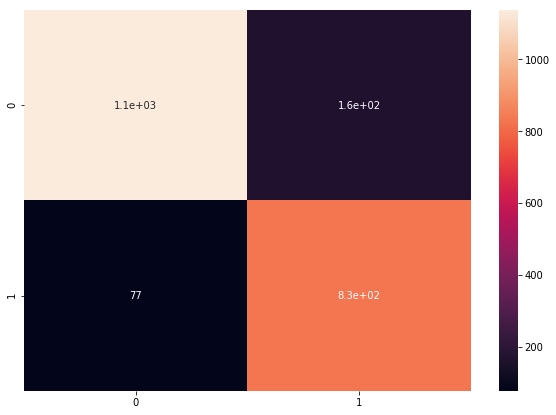

In [5]:
path_to_binary_result = "xlnet_binary/sst2.tsv"

label_results=[]
pd.DataFrame()

with open(path_to_binary_result) as file:
    result = csv.reader(file, delimiter="\t")
    for idx, row in enumerate(result):
        if idx == 0:
            continue
        label_results.append(int(round(float(row[1]))))

print(len(label_results))
df_results=pd.DataFrame()
df_results=pd.DataFrame(label_results)
df_results[0]

for i in range(0, len(binary_labels)): 
     binary_labels[i] = int(binary_labels[i])

cm = confusion_matrix(binary_labels, df_results[0])
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Accuracy for SST-2 root nodes", metrics.accuracy_score(binary_labels, df_results[0]))

2210
[[115 133  26   5   0]
 [ 91 333 173  35   1]
 [  9 105 166  98  11]
 [  0  12  64 284 150]
 [  0   0  15  96 288]]
Accuracy for SST-5 root nodes 0.5366515837104072


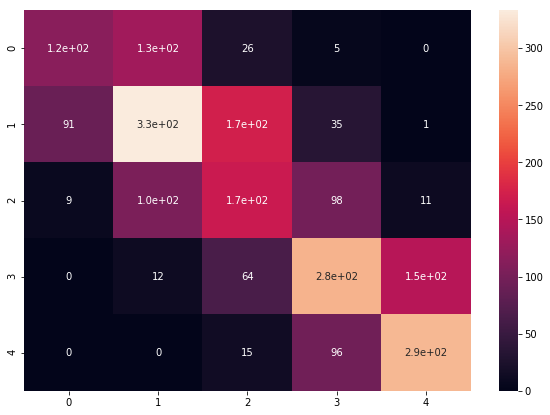

In [6]:
path_to_binary_result = "xlnet_fine_grained/sst5.tsv"

label_results=[]
pd.DataFrame()

with open(path_to_binary_result) as file:
    result = csv.reader(file, delimiter="\t")
    for idx, row in enumerate(result):
        if idx == 0:
            continue
        label_results.append(int(round(float(row[1]))))

print(len(label_results))
df_results=pd.DataFrame()
df_results=pd.DataFrame(label_results)
df_results[0]

for i in range(0, len(fg_labels)): 
     fg_labels[i] = int(fg_labels[i])

cm = confusion_matrix(fg_labels, df_results[0])
df_cm = pd.DataFrame(cm, index = [i for i in "01234"],
                  columns = [i for i in "01234"])
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Accuracy for SST-5 root nodes", metrics.accuracy_score(fg_labels, df_results[0]))